In [11]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [82]:
from IPython.display import Image

In [12]:
import numpy as np
import pandas as pd

In [13]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [28]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect

In [15]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [16]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [17]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [18]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [19]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Climate Analysis

# PRECIPITATION ANALYSIS

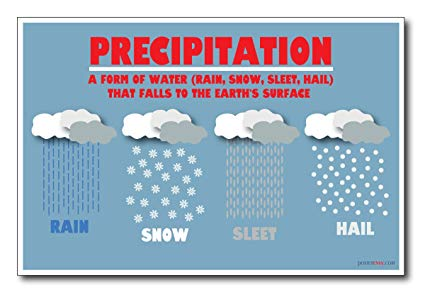

In [108]:
Image("Images/PRECIPITATION.jpg",width=800, height=200)

In [29]:
# --INSPECTING ---#
inspector = inspect(engine)
inspector.get_table_names()


['measurement', 'station']

In [30]:
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"],column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [31]:
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"],column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [40]:
#----FINDING THE MOST RECENT DATE----

start_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
start_date

('2017-08-23')

In [46]:
#----Design a query to retrieve the last 12 months of precipitation data----#
precipitation_12 = session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date >= '2016-08-24').filter(Measurement.date <= '2017-08-23').order_by(Measurement.date).all()

#Display
precipitation_12


[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [53]:
#--- SAVING THE QUERY RESULT AS A PANDAS DF & SETTING "DATE" AS INDEX & SORTING THE DF VALUES BY DATE---#
precipitation_12_df = pd.DataFrame(precipitation_12, columns=['Date','Precipitaion'])
precipitation_12_df.set_index('Date')
precipitation_12_df.sort_values(by=['Date'])
precipitation_12_df.head()

,Date,Precipitaion
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


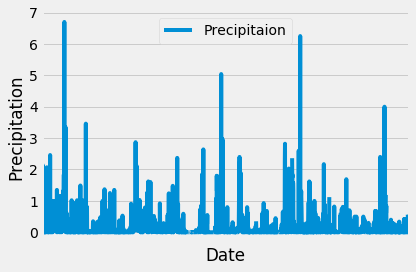

In [76]:
#--- PLOTTING RESULTS USING DF PLOT METHOD ---#
precipitation_12_df.plot(x='Date',y='Precipitaion')
plt.ylabel("Precipitation")
plt.xlabel("Date")
plt.xticks([])
plt.tight_layout()
plt.show()

In [78]:
#--- SUMMARY STATISTICS FOR THE DATA OBTAINED ---#
precipitation_12_df.describe()


,Precipitaion
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# STATION ANALYSIS

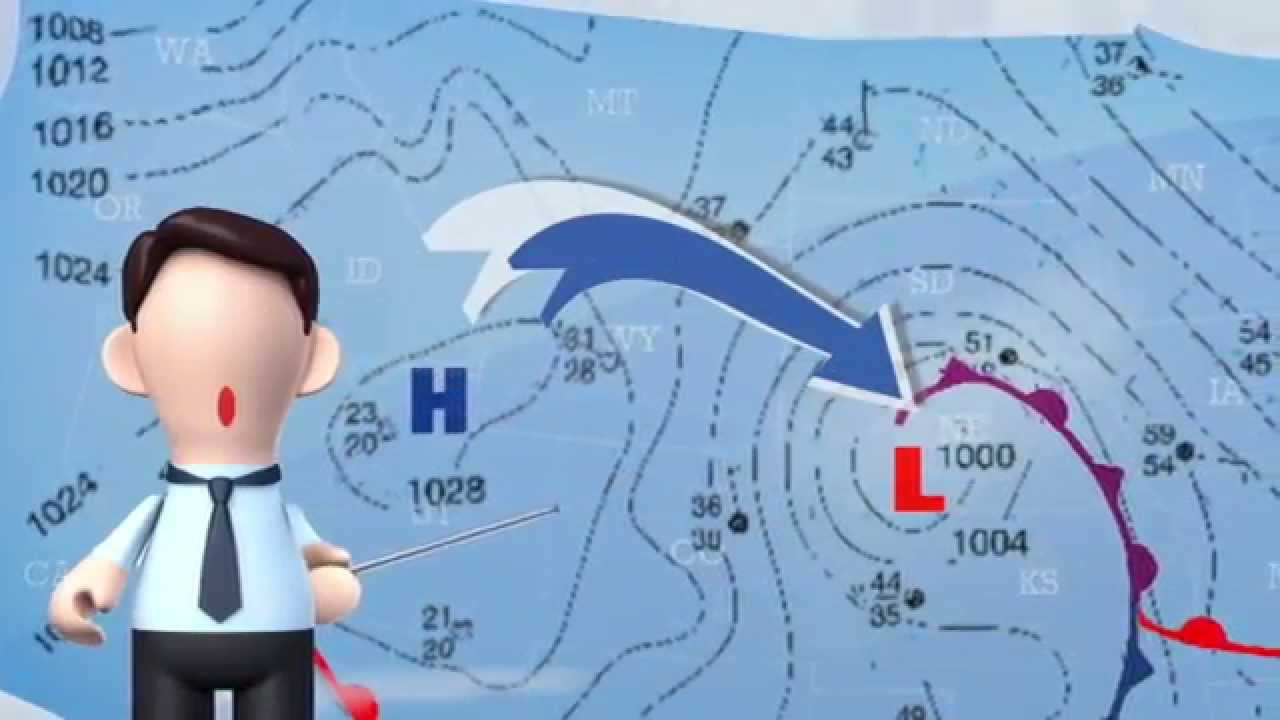

In [109]:
Image("Images/STATION.jpg",width=800, height=200)

In [85]:
#--- QUERY TO SHOW HOW MANY STATIONS ARE AVAILABEL IN THIS DATASET ---#
station_count = session.query(Station.id).count()
station_count

9

In [86]:
# ---What are the most active stations? (i.e. what stations have the most rows)? &
# List the stations and the counts in descending order. ---

session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [87]:
# Using the station id from the previous query, calculate the lowest temperature recorded,
# highest temperature recorded, and average temperature most active station? ---#
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

<function matplotlib.pyplot.show(*args, **kw)>

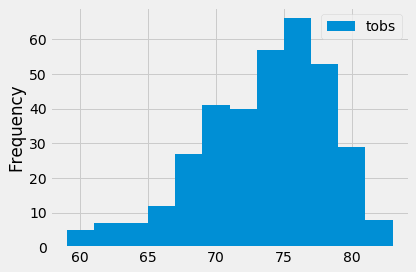

In [100]:
# --- PLOT THE RESULTS AS A HISTOGRAM --- #
temperature_USC00519281_12 = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= '2016-08-23').all()

station_high_temp_obs = pd.DataFrame(temperature_USC00519281_12, columns=['tobs'])
station_high_temp_obs.plot.hist(bins=12)
plt.tight_layout()
plt.show